## Tutorial for loading OCTRON prediction results

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os , sys
from pathlib import Path
cur_path = Path(os.getcwd()).parent.parent
sys.path.append(cur_path.as_posix())
from matplotlib import pyplot as plt
import cmasher as cmr
from tqdm import tqdm
import seaborn as sns # Seaborn is not strictly necessary, but it makes the plots look nicer (:
sns.set_theme(style='white')
%config InlineBackend.figure_format = 'retina'


/Users/horst/miniconda3/envs/octron/lib/python3.11/site-packages/matplotlib_inline/config.py:74: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


### YOLO OCTRON results reader

In [3]:
# To access any prediction results programmatically, you can use the YOLO_results class.
from octron import YOLO_results

objc[7596]: Class AVFFrameReceiver is implemented in both /Users/horst/miniconda3/envs/octron/lib/python3.11/site-packages/av/.dylibs/libavdevice.62.1.100.dylib (0x1501b43a8) and /Users/horst/miniconda3/envs/octron/lib/python3.11/site-packages/cv2/.dylibs/libavdevice.61.3.100.dylib (0x1669d43a8). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[7596]: Class AVFAudioReceiver is implemented in both /Users/horst/miniconda3/envs/octron/lib/python3.11/site-packages/av/.dylibs/libavdevice.62.1.100.dylib (0x1501b43f8) and /Users/horst/miniconda3/envs/octron/lib/python3.11/site-packages/cv2/.dylibs/libavdevice.61.3.100.dylib (0x1669d43f8). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.


In [29]:
# This is the output directory that contains csv tracking files and `predictions.zarr` that contains the masks
results_dir = '/Users/horst/Library/CloudStorage/GoogleDrive-hobenhaus@gmail.com/My Drive/OCTRON/Project folders - finished/octo_paralarvae/test/multi hatchling artemia data/octron_predictions_good/20221205_3PL_Ctrl1_1024x1024_HybridSort'

### Initiate loader class and load data 

In [5]:
yolo_results = YOLO_results(results_dir, verbose=True)

File: 20221205_3PL_Ctrl1_1024x1024.mp4
Codec: h264
Resolution: 1024 x 1024
Frame Rate: 30.00 fps
Number of frames: 6574
Duration: 219.13 seconds
Found 8 tracking CSV files in '20221205_3PL_Ctrl1_1024x1024_HybridSort'
Found tracking zarr in '20221205_3PL_Ctrl1_1024x1024_HybridSort'
Existing keys in zarr archive: ['1_masks', '3_masks', '4_masks', '5_masks', '6_masks', '7_masks', '9_masks', '10_masks']
Found 8 unique track IDs in zarr and CSVs: {1: 'mantle', 3: 'mantle', 4: 'head', 5: 'mantle', 6: 'mantle', 7: 'head', 9: 'mantle', 10: 'head'}


In [6]:
# yolo_results contains quite a bit of information now ... 
print(yolo_results.height, yolo_results.width, yolo_results.num_frames)
# The track_id_label is a dictionary that contains the track id as key and the label as value
print(yolo_results.track_id_label)

1024 1024 6574
{1: 'mantle', 3: 'mantle', 4: 'head', 5: 'mantle', 6: 'mantle', 7: 'head', 9: 'mantle', 10: 'head'}


In [7]:
# To load the tracking results: .get_tracking_data() returns a dictionary with track_id as key 
# Check the parameters of the function! 
# It allows you to interpolate the tracking, and to set a limit of frames for that interpolation, 
# and to set a sigma for the gaussian filter that is applied to the tracking
tracking = yolo_results.get_tracking_data(interpolate=True)
tracking.keys()

Frames are not continuous for track_id 4 in head_track_4.csv... interpolating
Frames are not continuous for track_id 7 in head_track_7.csv... interpolating
Frames are not continuous for track_id 10 in head_track_10.csv... interpolating
Frames are not continuous for track_id 1 in mantle_track_1.csv... interpolating
Frames are not continuous for track_id 3 in mantle_track_3.csv... interpolating
Frames are not continuous for track_id 5 in mantle_track_5.csv... interpolating
Frames are not continuous for track_id 9 in mantle_track_9.csv... interpolating


dict_keys([4, 7, 10, 1, 3, 5, 6, 9])

In [8]:
# For each tracked object (i.e. each track_id) we get another dictionary 
# that contains the keys "label", "data" (this is the position data as dataframe),
# and "features" these are the frame by frame features of the object (like area, eccentricity, etc.)
print(tracking[3].keys())
print(tracking[3]['label'])

dict_keys(['label', 'data', 'features'])
mantle


In [9]:
# These are the tracking data 
tracking[3]['data'].head()

,track_id,frame_idx,pos_y,pos_x
0,3,43,578.496520,733.311678
1,3,44,593.996471,754.657927
2,3,45,609.496422,776.004176
3,3,46,624.996374,797.350425
4,3,47,640.496325,818.696674


In [10]:
# and this is an example of the features that are calculated for each frame
tracking[3]['features'].head()

,frame_idx,confidence,bbox_x_min,bbox_x_max,bbox_y_min,bbox_y_max,bbox_area,area,eccentricity,solidity,orientation
0,43,0.586554,721.944760,766.147030,569.587400,603.175200,1484.65560,648.0,0.812846,0.973626,0.056893
1,44,0.564646,742.720272,786.192644,584.057633,618.293962,1483.12605,696.5,0.791360,0.974099,0.084626
2,45,0.542738,763.495783,806.238258,598.527867,633.412723,1481.59650,745.0,0.769875,0.974572,0.112359
3,46,0.520829,784.271295,826.283872,612.998100,648.531485,1480.06695,793.5,0.748389,0.975045,0.140092
4,47,0.498921,805.046807,846.329487,627.468333,663.650247,1478.53740,842.0,0.726904,0.975517,0.167825


In [11]:
# If you want you can merge the features with the tracking data
# Use the "frame_idx" as key to merge the two dataframes, which is the actual index of the frame 
# in the original video
tracking_features = tracking[3]['data'].merge(tracking[3]['features'], on='frame_idx', how='left')
tracking_features.head()

,track_id,frame_idx,pos_y,pos_x,confidence,bbox_x_min,bbox_x_max,bbox_y_min,bbox_y_max,bbox_area,area,eccentricity,solidity,orientation
0,3,43,578.496520,733.311678,0.586554,721.944760,766.147030,569.587400,603.175200,1484.65560,648.0,0.812846,0.973626,0.056893
1,3,44,593.996471,754.657927,0.564646,742.720272,786.192644,584.057633,618.293962,1483.12605,696.5,0.791360,0.974099,0.084626
2,3,45,609.496422,776.004176,0.542738,763.495783,806.238258,598.527867,633.412723,1481.59650,745.0,0.769875,0.974572,0.112359
3,3,46,624.996374,797.350425,0.520829,784.271295,826.283872,612.998100,648.531485,1480.06695,793.5,0.748389,0.975045,0.140092
4,3,47,640.496325,818.696674,0.498921,805.046807,846.329487,627.468333,663.650247,1478.53740,842.0,0.726904,0.975517,0.167825


In [12]:
# There are convenience functions to get the label name for a specific track_id
yolo_results.get_label_for_track_id(3)

'mantle'

In [13]:
# ... and to get the track_id for a specific label.
# This spits out a list of track_ids for the label "head" (since there could be multiple!)
yolo_results.get_track_id_for_label('mantle')

[1, 3, 5, 6, 9]

In [14]:
# To load the tracking for just a specific label, we can use the function .get_tracking_data_for_label()
# For example ... 
data_label = 'mantle'
tracking_example_label = yolo_results.get_tracking_for_label(data_label, interpolate=True, interpolate_limit=None, sigma=2)
tracking_example_label

Frames are not continuous for track_id 4 in head_track_4.csv... interpolating
Smoothing position data for track_id 4 with sigma=2
Frames are not continuous for track_id 7 in head_track_7.csv... interpolating
Smoothing position data for track_id 7 with sigma=2
Frames are not continuous for track_id 10 in head_track_10.csv... interpolating
Smoothing position data for track_id 10 with sigma=2
Frames are not continuous for track_id 1 in mantle_track_1.csv... interpolating
Smoothing position data for track_id 1 with sigma=2
Frames are not continuous for track_id 3 in mantle_track_3.csv... interpolating
Smoothing position data for track_id 3 with sigma=2
Frames are not continuous for track_id 5 in mantle_track_5.csv... interpolating
Smoothing position data for track_id 5 with sigma=2
Smoothing position data for track_id 6 with sigma=2
Frames are not continuous for track_id 9 in mantle_track_9.csv... interpolating
Smoothing position data for track_id 9 with sigma=2


,track_id,frame_idx,pos_y,pos_x
0,1,30,934.516328,796.219276
1,1,31,919.360267,789.342703
2,1,32,892.680808,782.801139
3,1,33,860.706829,784.180618
4,1,34,830.308643,794.640884
...,...,...,...,...
6539,1,6569,951.812318,603.504545
6540,1,6570,950.933451,608.985459
6541,1,6571,950.073730,612.869665
6542,1,6572,949.392602,615.292251


(1024.0, 0.0)

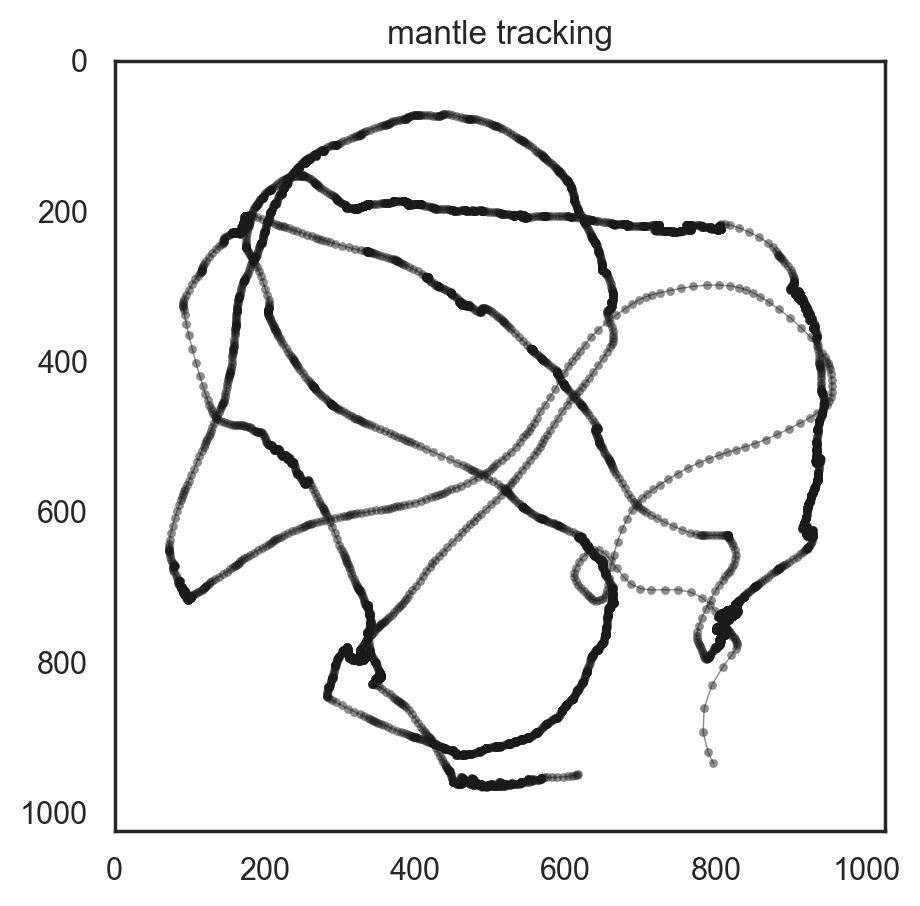

In [17]:
figure = plt.figure(figsize=(5, 5))
ax = figure.add_subplot(111)
ax.set_title(f'{data_label} tracking')
ax.scatter(tracking_example_label['pos_x'], tracking_example_label['pos_y'], c='k', s=10, alpha=0.5, lw=0)  
ax.plot(tracking_example_label['pos_x'], tracking_example_label['pos_y'], c='k', alpha=0.5, lw=0.5)
plt.axis('scaled')
ax.set_xlim(0, yolo_results.width)
ax.set_ylim(yolo_results.height, 0)

In [18]:
# Similarly, to load features for one label, use .get_features_for_label()
features_example_label = yolo_results.get_features_for_label(data_label)
features_example_label.head()

,frame_idx,confidence,bbox_x_min,bbox_x_max,bbox_y_min,bbox_y_max,bbox_area,area,eccentricity,solidity,orientation
0,30,0.320262,836.39526,879.39060,967.64340,1008.76250,1767.9323,718.5,0.198763,0.990772,0.137730
1,33,0.342803,659.43280,710.60565,843.89087,898.25830,2782.1365,2251.0,0.743399,0.965680,0.645418
2,34,0.539369,811.28630,863.42914,763.41846,805.97095,2218.8070,1466.0,0.623785,0.952567,-1.484293
3,55,0.755338,780.17114,822.29517,717.16210,755.53174,1616.2832,1093.0,0.749611,0.899588,1.039906
4,56,0.860348,763.28310,811.30040,682.88020,729.64120,2245.3380,1688.0,0.501137,0.964021,0.753610


### Mask data

In [19]:
# To load the mask data, use .get_mask_data()
# You have the option to close holes in the masks, which is useful for some applications
# CAVE: close_holes is a very expensive operation, so use it only if you really need it!
masks = yolo_results.get_mask_data(close_holes=False)
# This returns a dictionary with the track_id as key

In [20]:
# Each masks entry is a dictionary with the keys "label", "data" and "frame_indices",
# where frame_indices is a list of frame indices for which the mask is available
masks[3].keys()

dict_keys(['label', 'data', 'frame_indices'])

In [21]:
# To load masks for a specific label, there is a convenience function .get_masks_for_label()
# It returns a tuple with the masks and the frame indices
data_label = 'mantle'
masks_example_label, frame_indices = yolo_results.get_masks_for_label(data_label, close_holes=False)

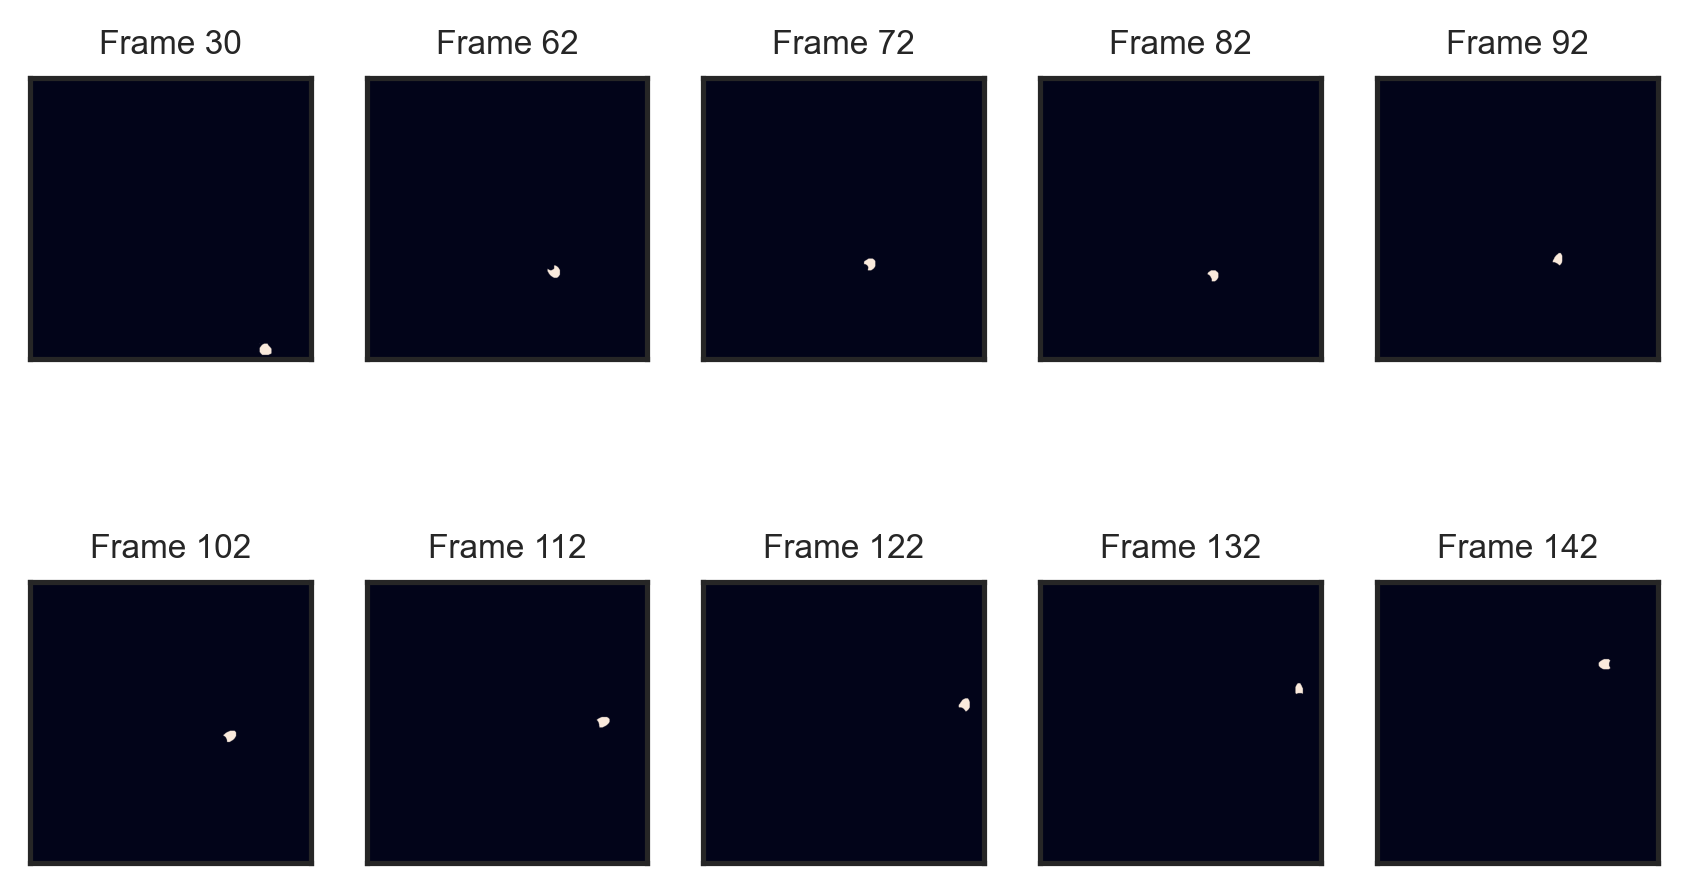

In [22]:
figure = plt.figure(figsize=(7, 4), dpi=150)
for no, index in enumerate(range(0,100,10)):
    current_index = frame_indices[index]
    ax = figure.add_subplot(2, 5, no+1) 
    ax.imshow(masks_example_label[current_index])
    ax.set_title(f'Frame {current_index}', fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [23]:
# If you want to just know which of the video frames contain data for each track_id,
# you use .get_frame_indices()
frame_indices_across_ids = yolo_results.get_frame_indices()
frame_indices_across_ids[3]

array([43, 55, 56])

### Some playful examples

#### Draw outlines ... 

In [24]:
from octron.yolo_octron.helpers.yolo_plotting import (make_linear_colormap,
                                                      get_outline
                                                      )

100%|██████████| 6500/6500 [23:05<00:00,  4.69it/s]


[]

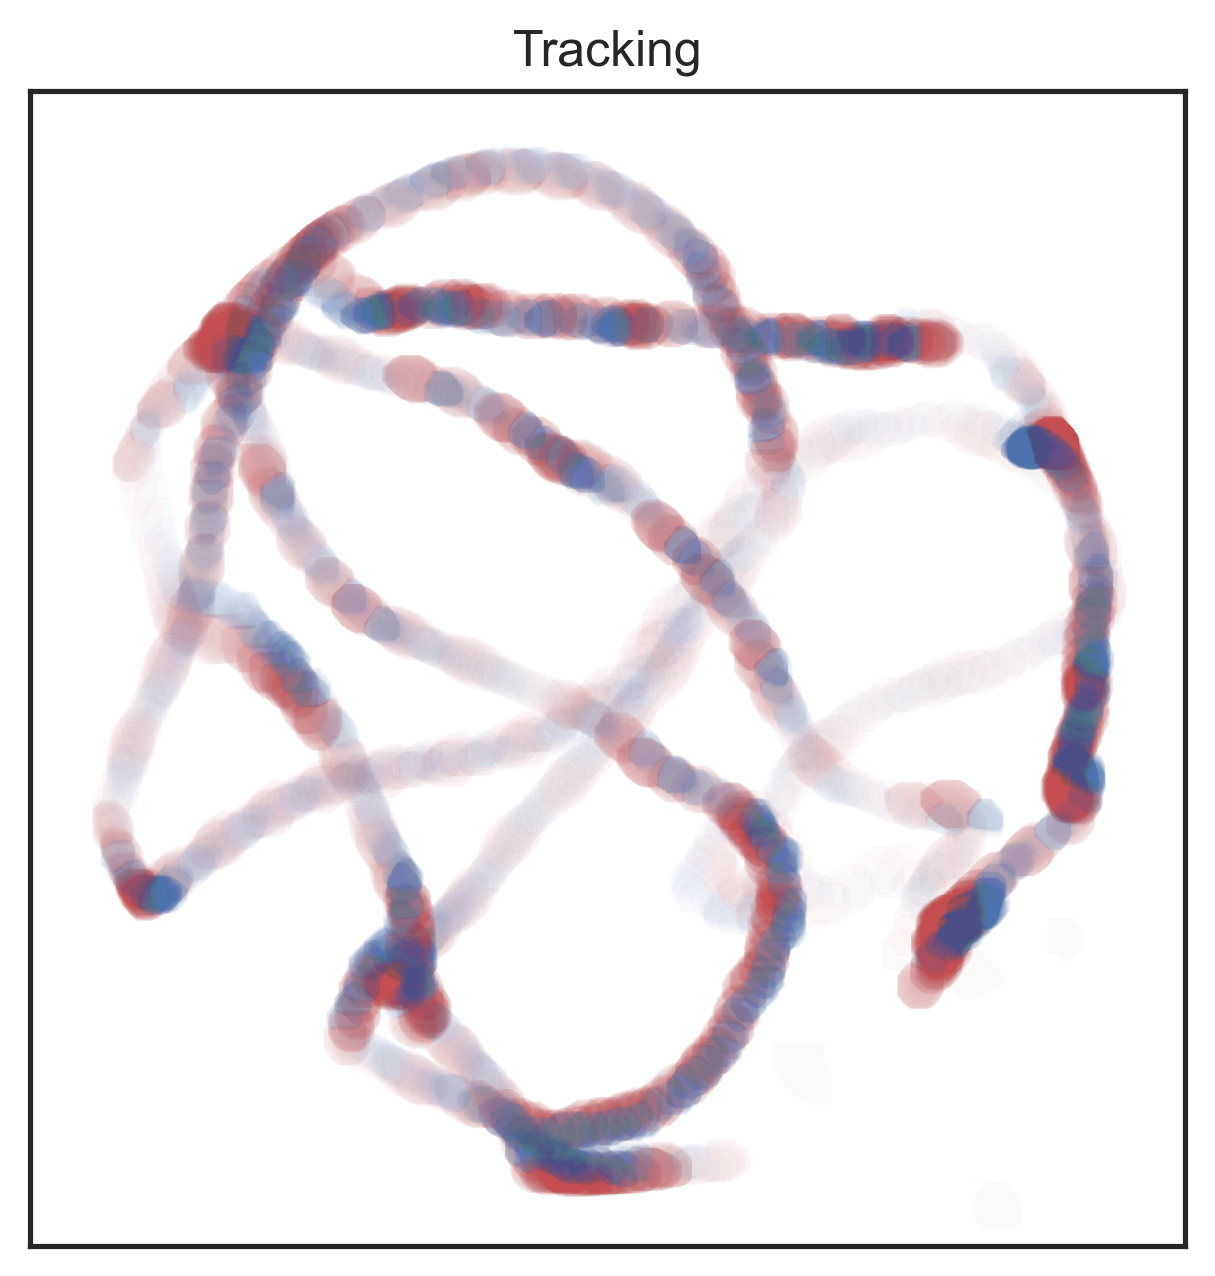

In [25]:
masks_mantle, frame_indices_masks = yolo_results.get_masks_for_label('mantle')
masks_head, _ = yolo_results.get_masks_for_label('head')

outlines_mantle = []
outlines_head = []

figure = plt.figure(figsize=(5, 5), dpi=150)
ax = figure.add_subplot(111)
ax.set_title(f'Tracking')

for frame_idx in tqdm(frame_indices_masks):
    mask_mantle = masks_mantle[frame_idx]
    mask_head = masks_head[frame_idx]
    outline_mantle = get_outline(mask_mantle)
    outline_head = get_outline(mask_head)
    outlines_mantle.append(outline_mantle)
    outlines_head.append(outline_head)

for outline_mantle, outline_head in zip(outlines_mantle, outlines_head):
    ax.plot(outline_mantle[:, 1], outline_mantle[:, 0], color='r', lw=0.5, alpha=0.025)
    ax.plot(outline_head[:, 1], outline_head[:, 0], color='b', lw=0.5, alpha=0.025) 
    
plt.axis('scaled')
ax.set_xlim(0, yolo_results.width)
ax.set_ylim(yolo_results.height, 0)
ax.set_xticks([])
ax.set_yticks([])

#### How to mask original video frames

Text(0.5, 1.0, 'Masked video frame for mantle at frame index 30')

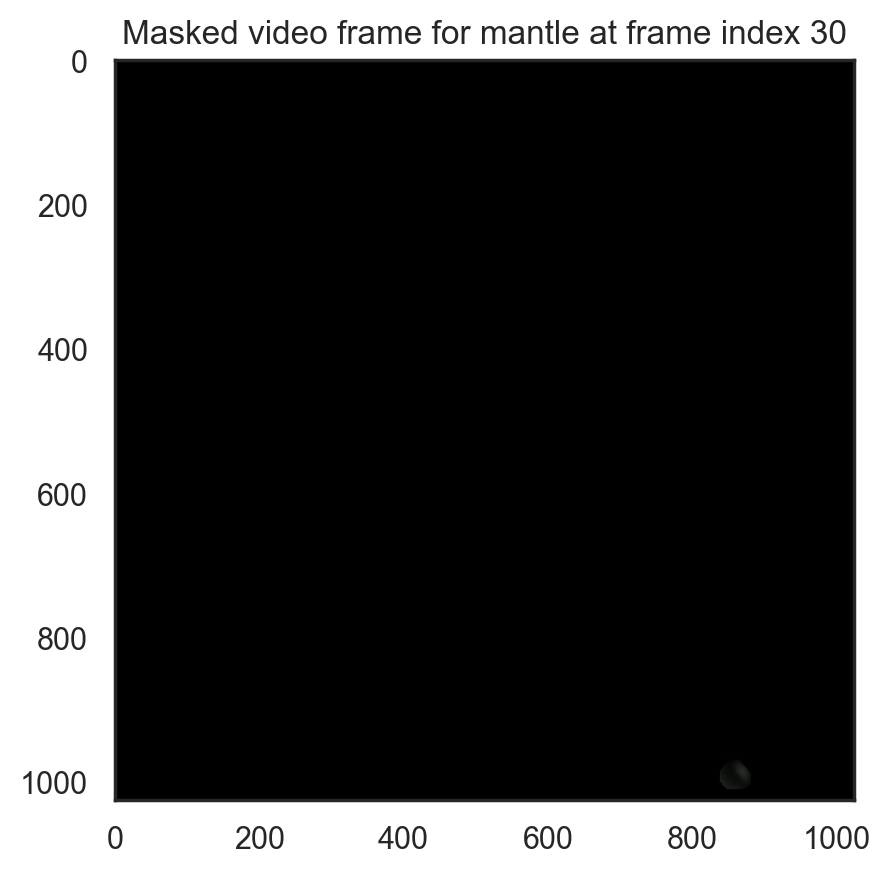

In [26]:
# Sometimes you might want to use the mask data together with the original video 
# to extract masked video frames. 
# This can then be used to use the original video data to calculate image statistics 
# for only the masked area. 

# There is a convenience function to extract the masked video frames
data_label = 'mantle'
masked_video_frames = yolo_results.get_masked_video_frames(data_label, [frame_indices[0]])
plt.imshow(masked_video_frames)
plt.title(f'Masked video frame for {data_label} at frame index {frame_indices[0]}')

### YOLO OCTRON and napari

In [27]:
# You can access the yolo_octron class directly if you want to use it for your own purposes
# This allows you to plot things in napari like you would when 
# drag-and-dropping the results into napari
# This is just a convenience function to load the results, but should not be used for 
# any serious analysis.
# In fact, YOLO_octron accesses YOLO_results to load the results.
from octron import YOLO_octron

In [30]:
yolo_octron = YOLO_octron()

# Loop over all results and add them to napari one by one
for label, track_id, color, tracking_df, features_df, masks in yolo_octron.load_predictions(save_dir=results_dir, 
                                                                                            sigma_tracking_pos=2, 
                                                                                            open_viewer=True
                                                                                            ):
    # you can access the tracking_df and features_df here if you want to ...
    # ... 
    # ... 
    # ... or just continue 
    continue

No models YAML path provided. Model dictionary will be empty.
File: 20221205_3PL_Ctrl1_1024x1024.mp4
Codec: h264
Resolution: 1024 x 1024
Frame Rate: 30.00 fps
Number of frames: 6574
Duration: 219.13 seconds
Found 8 tracking CSV files in '20221205_3PL_Ctrl1_1024x1024_HybridSort'
Found tracking zarr in '20221205_3PL_Ctrl1_1024x1024_HybridSort'
Existing keys in zarr archive: ['1_masks', '3_masks', '4_masks', '5_masks', '6_masks', '7_masks', '9_masks', '10_masks']
Found 8 unique track IDs in zarr and CSVs: {1: 'mantle', 3: 'mantle', 4: 'head', 5: 'mantle', 6: 'mantle', 7: 'head', 9: 'mantle', 10: 'head'}
Frames are not continuous for track_id 4 in head_track_4.csv... interpolating
Smoothing position data for track_id 4 with sigma=2
Frames are not continuous for track_id 7 in head_track_7.csv... interpolating
Smoothing position data for track_id 7 with sigma=2
Frames are not continuous for track_id 10 in head_track_10.csv... interpolating
Smoothing position data for track_id 10 with sigma=2